<a href="https://colab.research.google.com/github/saif90834/CAMPUSX_24_4_2024/blob/main/Complete_Case_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('data_science_job.csv')   # Details of Data Science Job Applicants in a company

In [ ]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [ ]:
df.isnull().mean()

enrollee_id               0.000000
city                      0.000000
city_development_index    0.025003
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
training_hours            0.039983
target                    0.000000
dtype: float64

In [ ]:
# 0 1 0 0 0 1 0 1 0 0 0 = 3/10 = 0.3 * 100 = 30%

In [ ]:
# df["company_size"].isnull().mean()*100

### Percentage of Null Values in Each Column

In [ ]:
# df.isnull().mean()

In [ ]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [ ]:
df.shape

(19158, 13)

### Extracted Columns with less than 5% Null Values

In [ ]:
cols = [col for col in df.columns if (df[col].isnull().mean()*100) < 5 and (df[col].isnull().mean()*100) > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [ ]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
17396,0.897,no_enrollment,NaN,7.0,52.0
7293,0.920,no_enrollment,Graduate,17.0,14.0
18866,NaN,no_enrollment,Graduate,8.0,47.0
7779,0.896,no_enrollment,Graduate,7.0,34.0
17331,0.843,no_enrollment,Masters,8.0,14.0


### Percentage of Rows got deleted after CCA

In [ ]:
len(df[cols].dropna()) / len(df)*100

89.68577095730244

In [ ]:
new_df = df[cols].dropna()


print("Before CCA:-",df.shape,"                    ", "After CCA:-",new_df.shape)

Before CCA:- (19158, 13)                      After CCA:- (17182, 5)


### Histogram for New_DF Features

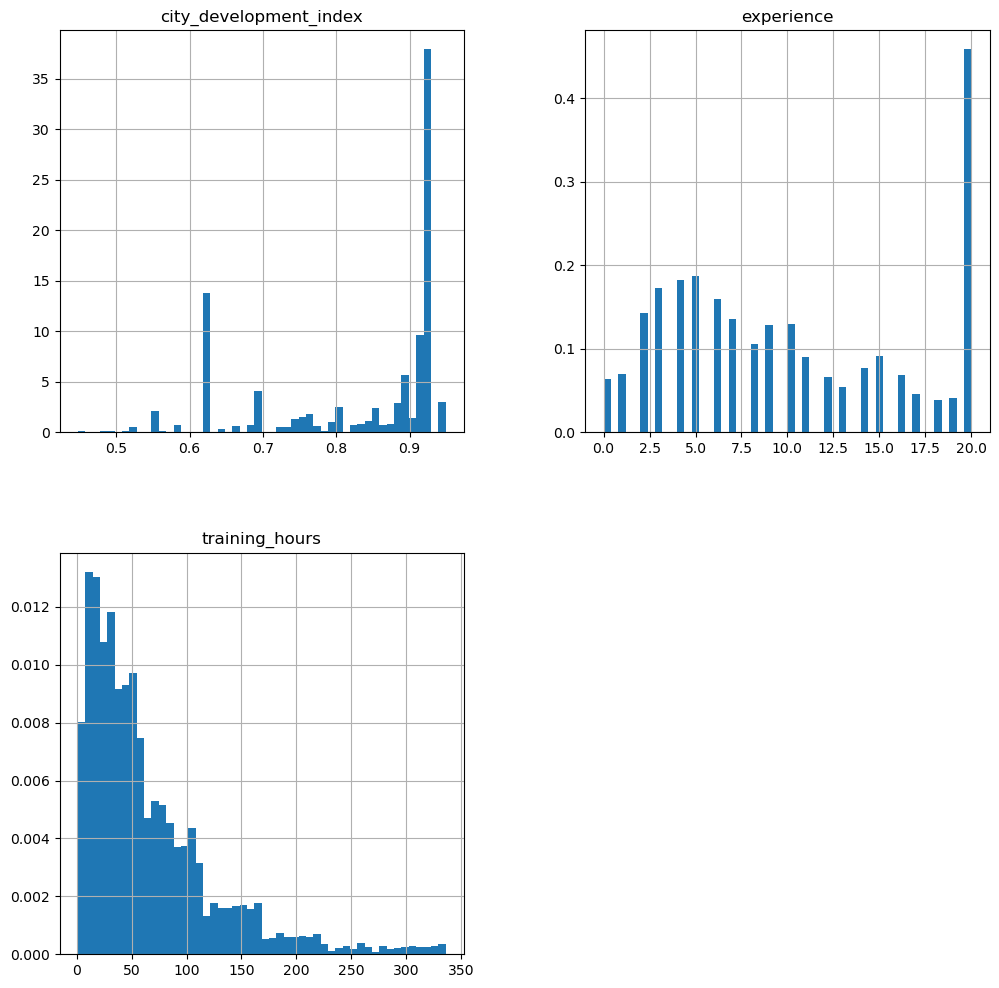

In [ ]:
new_df.hist(bins=50, density=True, figsize=(12, 12))
plt.show()

## Comparing the Distributions of Features - Before and After CCA for Numerical Features.
### The Overlapping of Both the Distribution implies MCAR. Hence, CCA can be performed.

### training_hours

<Axes: >

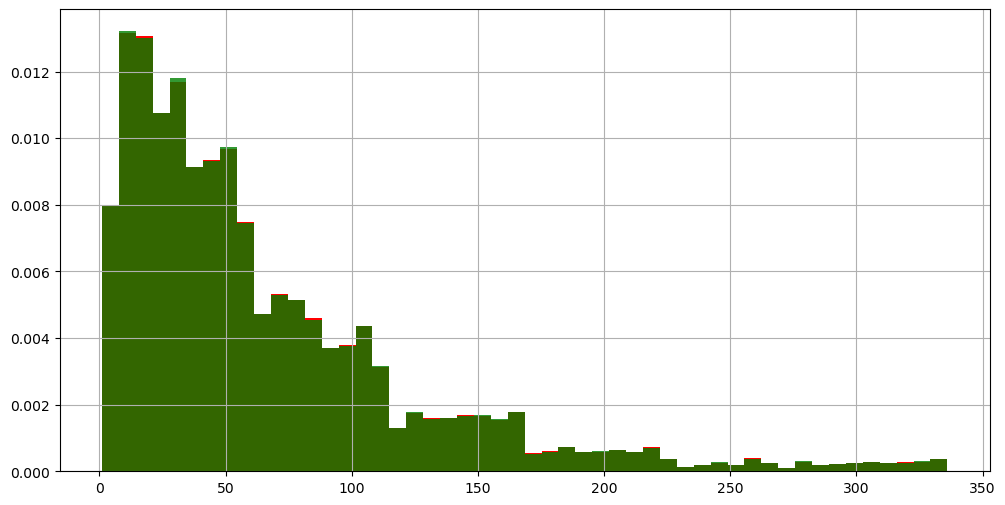

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

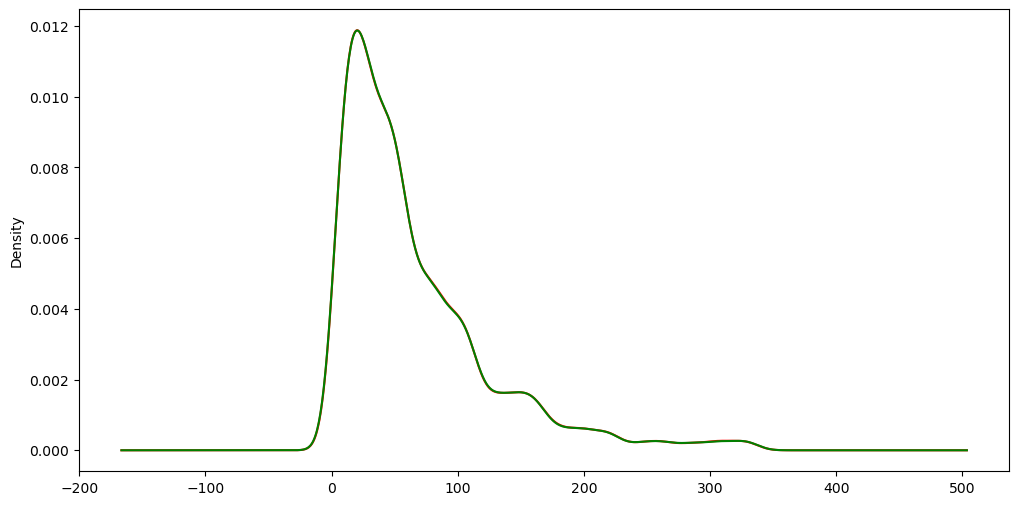

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

# original data
df['training_hours'].plot.density(color='red')

# data after cca
new_df['training_hours'].plot.density(color='green')

### city_development_index

<Axes: >

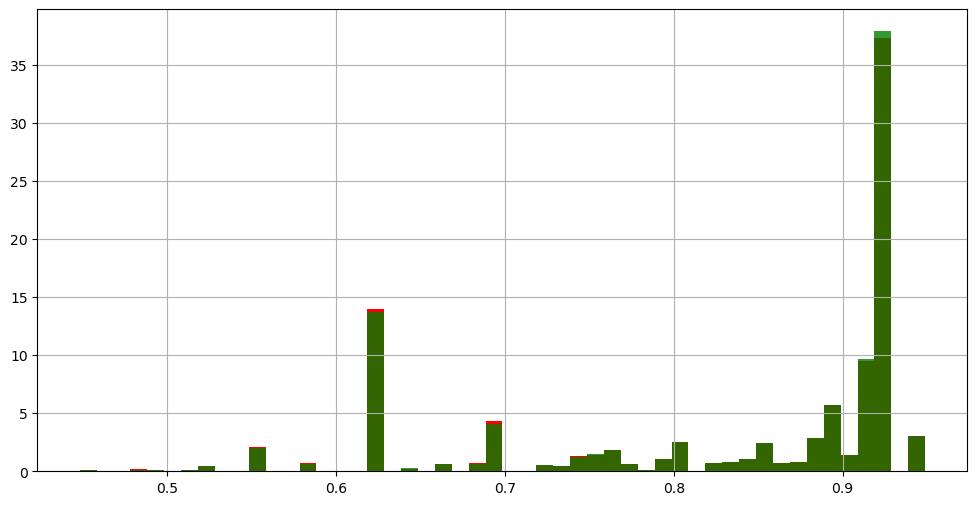

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

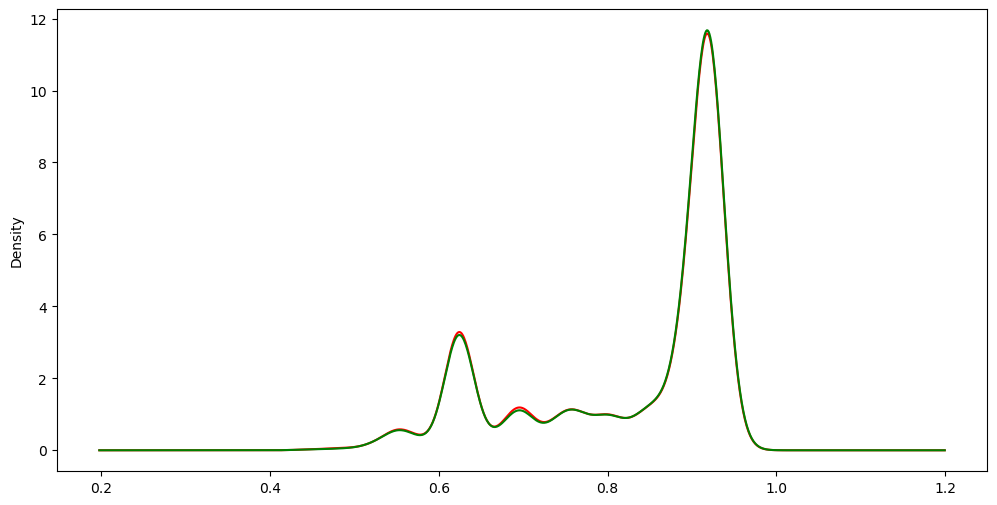

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color='red')

# data after cca
new_df['city_development_index'].plot.density(color='green')

### experience

<Axes: >

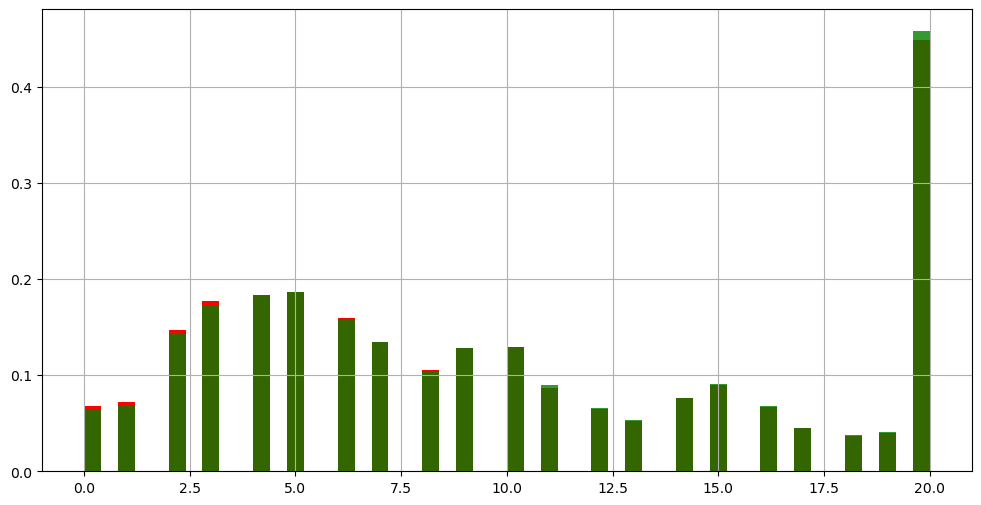

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

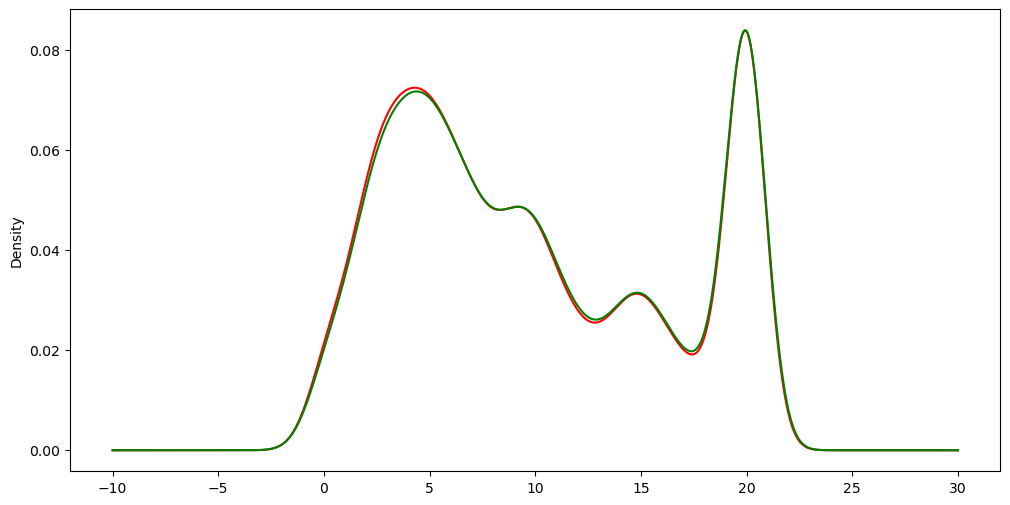

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

# original data
df['experience'].plot.density(color='red')

# data after cca
new_df['experience'].plot.density(color='green')

## Comparing the Ratio of Categories Before and After CCA in categorical features

### enrolled_university

In [ ]:
# df['enrolled_university'].value_counts()
# df['education_level'].value_counts()

In [ ]:
df['enrolled_university'].value_counts() / len(df)*100

enrolled_university
no_enrollment       72.121307
Full time course    19.610607
Part time course     6.253262
Name: count, dtype: float64

In [ ]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df)*100,

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)*100
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
enrolled_university,,
no_enrollment,72.121307,73.518799
Full time course,19.610607,20.073333
Part time course,6.253262,6.407869


### education_level

In [ ]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df)*100,

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)*100
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
education_level,,
Graduate,60.538678,61.983471
Masters,22.763336,23.408218
High School,10.528239,10.737982
Phd,2.160977,2.211617
Primary School,1.607683,1.658713


#### Categories Ratio is maintained in both the categorical features which implies the missing data is MCAR. Hence CCA can be done

#### Although CCA is possible on such datasets, but the Model deployed after training on such data with nulls removed
#### will face problem because it has not learned anything about null data. But in production, It may come across data
#### containing null values.